In [36]:
import openglider
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jinja2 import Environment, FileSystemLoader

In [37]:
glider = openglider.load("leparagliding.json")

In [3]:
aoa_abs = np.array([r.aoa_absolute for r in glider.ribs])
np.rad2deg(aoa_abs)

array([-2.04250647, -2.04250647, -2.02121969, -1.98536244, -1.93064779,
       -1.86632334, -1.77999843, -1.66912073, -1.51285183, -1.28445466,
       -0.95126772, -0.46391041,  0.21409315,  1.12183828,  2.17425368,
        1.84688665])

In [4]:
aoa_rel = np.array([r.aoa_relative for r in glider.ribs])
np.rad2deg(aoa_rel)

array([9.25858832, 9.25858832, 9.21137513, 9.11664602, 8.98121013,
       8.79386995, 8.5626091 , 8.28142371, 7.95685454, 7.59197991,
       7.18467373, 6.73622996, 6.22681165, 5.639404  , 4.89412954,
       3.59417463])

In [5]:
gamma = np.arctan(1 / glider.glide)
np.rad2deg(gamma)

11.309932474020215

In [6]:
alpha_max = np.rad2deg(aoa_abs[0] + gamma)
alpha_max   # not exactly aoa_rel[0] because of rib not at center

9.267426001959443

In [7]:
washin = np.rad2deg(aoa_abs - aoa_abs[0])
washin

array([0.        , 0.        , 0.02128678, 0.05714404, 0.11185868,
       0.17618313, 0.26250804, 0.37338574, 0.52965464, 0.75805181,
       1.09123876, 1.57859606, 2.25659962, 3.16434475, 4.21676015,
       3.88939312])

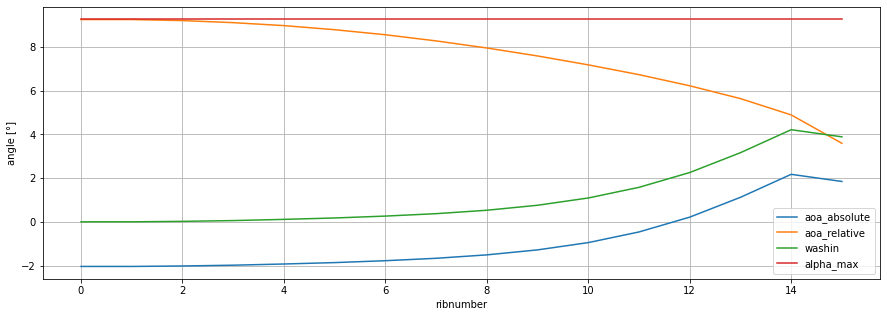

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(np.rad2deg(aoa_abs), label="aoa_absolute")
plt.plot(np.rad2deg(aoa_rel), label="aoa_relative")
plt.plot(washin, label="washin")
plt.plot([alpha_max] * 16, label="alpha_max")
plt.xlabel("ribnumber")
plt.ylabel("angle [°]")
plt.legend()
plt.grid()
plt.show()

In [9]:
y_le, xp, z = np.array([r.pos for r in glider.ribs]).T * 1.0e2  # 1.e2 scaling m -> cm
y_le, xp, z

(array([  0.        ,   0.        ,   1.37529839,   4.05290433,
          8.1563058 ,  13.72724624,  20.90199946,  29.77354457,
         40.51245115,  52.91700854,  66.908006  ,  82.48150986,
         99.73228837, 118.27068734, 138.30679246, 159.15385666]),
 array([-25.71262885,  25.71262885,  74.60114916, 121.31123827,
        166.424298  , 209.85151801, 251.02441999, 289.1375159 ,
        323.42642286, 353.29904297, 378.59177971, 399.30122657,
        415.46775586, 427.22923218, 434.5771413 , 437.78427523]),
 array([-4.98732999e-15, -4.98732999e-15, -3.92476937e+00, -1.13172810e+01,
        -2.19779348e+01, -3.57366195e+01, -5.23091127e+01, -7.12034894e+01,
        -9.18233770e+01, -1.13492305e+02, -1.35761590e+02, -1.58269354e+02,
        -1.80744215e+02, -2.03023738e+02, -2.24721603e+02, -2.45502250e+02]))

In [10]:
chord = np.array([r.chord for r in glider.ribs]) * 1.0e2
y_te = y_le + chord
y_te

array([308.41945696, 308.41945696, 307.62100469, 306.11055258,
       303.88103536, 300.94215428, 297.3483516 , 293.17576627,
       288.50818803, 283.45420767, 278.16042248, 272.58344371,
       266.79166536, 260.60841286, 253.90519077, 246.22166338])

In [11]:
x_rib = glider.shape_simple.front.data.T[0] * 1.0e2
x_rib

array([  0.        ,  25.71262885,  74.75843634, 122.04989067,
       168.40544804, 213.96008383, 258.34313676, 300.88259554,
       340.89395525, 377.79809989, 411.49741072, 442.08303874,
       469.76834285, 494.96178342, 517.87005955, 538.89673319])

In [12]:
beta = np.rad2deg(np.array([r.arcang for r in glider.ribs]))
beta

array([-2.29493025,  2.29493025,  6.7915559 , 11.14444755, 15.43748711,
       19.75229742, 24.1474745 , 28.69529638, 33.48859857, 38.65948446,
       44.37272399, 50.82734814, 58.22106043, 66.73084739, 76.25905397,
       81.22660578])

In [29]:
rp = np.array([0.] * len(beta))
ribs_number = np.array(list(range(len(rp))), dtype=int)

In [43]:
data = {"ribs": ribs_number,
       "x_rib": x_rib,
       "y_le": y_le, 
       "y_te": y_te,
       "xp": xp,
       "z": z,
       "beta": beta,
       "rp": rp,
       "washin": washin}
data_frame = pd.DataFrame(data)
if glider.has_center_cell:
    data_frame = data_frame[1:]
data_frame

,ribs,x_rib,y_le,y_te,xp,z,beta,rp,washin
1,1,25.712629,0.000000,308.419457,25.712629,-4.987330e-15,2.294930,0.0,0.000000
2,2,74.758436,1.375298,307.621005,74.601149,-3.924769e+00,6.791556,0.0,0.021287
3,3,122.049891,4.052904,306.110553,121.311238,-1.131728e+01,11.144448,0.0,0.057144
4,4,168.405448,8.156306,303.881035,166.424298,-2.197793e+01,15.437487,0.0,0.111859
5,5,213.960084,13.727246,300.942154,209.851518,-3.573662e+01,19.752297,0.0,0.176183
6,6,258.343137,20.901999,297.348352,251.024420,-5.230911e+01,24.147475,0.0,0.262508
7,7,300.882596,29.773545,293.175766,289.137516,-7.120349e+01,28.695296,0.0,0.373386
8,8,340.893955,40.512451,288.508188,323.426423,-9.182338e+01,33.488599,0.0,0.529655
9,9,377.798100,52.917009,283.454208,353.299043,-1.134923e+02,38.659484,0.0,0.758052
10,10,411.497411,66.908006,278.160422,378.591780,-1.357616e+02,44.372724,0.0,1.091239


In [45]:
data_frame.to_string(index=None)

' ribs       x_rib        y_le        y_te          xp             z       beta   rp    washin\n    1   25.712629    0.000000  308.419457   25.712629 -4.987330e-15   2.294930  0.0  0.000000\n    2   74.758436    1.375298  307.621005   74.601149 -3.924769e+00   6.791556  0.0  0.021287\n    3  122.049891    4.052904  306.110553  121.311238 -1.131728e+01  11.144448  0.0  0.057144\n    4  168.405448    8.156306  303.881035  166.424298 -2.197793e+01  15.437487  0.0  0.111859\n    5  213.960084   13.727246  300.942154  209.851518 -3.573662e+01  19.752297  0.0  0.176183\n    6  258.343137   20.901999  297.348352  251.024420 -5.230911e+01  24.147475  0.0  0.262508\n    7  300.882596   29.773545  293.175766  289.137516 -7.120349e+01  28.695296  0.0  0.373386\n    8  340.893955   40.512451  288.508188  323.426423 -9.182338e+01  33.488599  0.0  0.529655\n    9  377.798100   52.917009  283.454208  353.299043 -1.134923e+02  38.659484  0.0  0.758052\n   10  411.497411   66.908006  278.160422  378.59

In [60]:
def lepar_rib_geo(glider):
    aoa_abs = np.array([r.aoa_absolute for r in glider.ribs])
    aoa_rel = np.array([r.aoa_relative for r in glider.ribs])
    gamma = np.arctan(1 / glider.glide)
    alpha_max = np.rad2deg(aoa_abs[0] + gamma)
    washin = np.rad2deg(aoa_abs - aoa_abs[0])
    y_le, xp, z = np.array([r.pos for r in glider.ribs]).T
    chord = np.array([r.chord for r in glider.ribs])
    y_te = y_le + chord
    x_rib = glider.shape_simple.front.data.T[0]
    beta = np.rad2deg(np.array([r.arcang for r in glider.ribs]))
    rp = np.array([0.] * len(beta))
    ribs_number = np.array(list(range(len(rp))), dtype=int)
    data = { "Rib": ribs_number,
             "x_rib": x_rib,
             "y_LE": y_le, 
             "y_TE": y_te,
             "xp": xp,
             "z": z,
             "beta": beta,
             "RP": rp,
             "Washin": washin}
    data_frame = pd.DataFrame(data)
    if glider.has_center_cell:
        data_frame = data_frame[1:]
    data =  data_frame.to_csv(index=None, sep="\t", float_format='%.4f')
    return glider.glide, alpha_max, data

In [61]:

env = Environment( loader = FileSystemLoader(".") )
template = env.get_template('leparagliding.txt.template')
 
GR, alpha_max, rib_geo = lepar_rib_geo(glider)
complete_glider = glider.copy_complete()

with open("rendered.txt", 'w') as fh:
    fh.write(template.render(
        GR=glider.glide,
        alpha_max="{:.2f}".format(alpha_max),
        rib_geo=rib_geo,
        num_cells=len(glider.copy_complete().cells),
        num_ribs=len(glider.copy_complete().ribs),
        
    ))